In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df=pd.read_csv(r"E:\datasets\nasa-asteroids-classification\nasa.csv")

In [3]:
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance
from numpy import sort
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [4]:
df['avg_dia'] = df[['Est Dia in KM(min)', 'Est Dia in KM(max)']].mean(axis=1)

In [5]:
X = df[['Absolute Magnitude','avg_dia', 'Relative Velocity km per hr','Miss Dist.(kilometers)','Orbit Uncertainity',
        'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant','Epoch Osculation','Eccentricity','Semi Major Axis',
        'Inclination','Asc Node Longitude','Orbital Period','Perihelion Distance','Perihelion Arg',
        'Aphelion Dist','Perihelion Time','Mean Anomaly','Mean Motion']]

In [6]:
y = df['Hazardous'].astype(int)
y.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    0
7    0
8    0
9    1
Name: Hazardous, dtype: int32

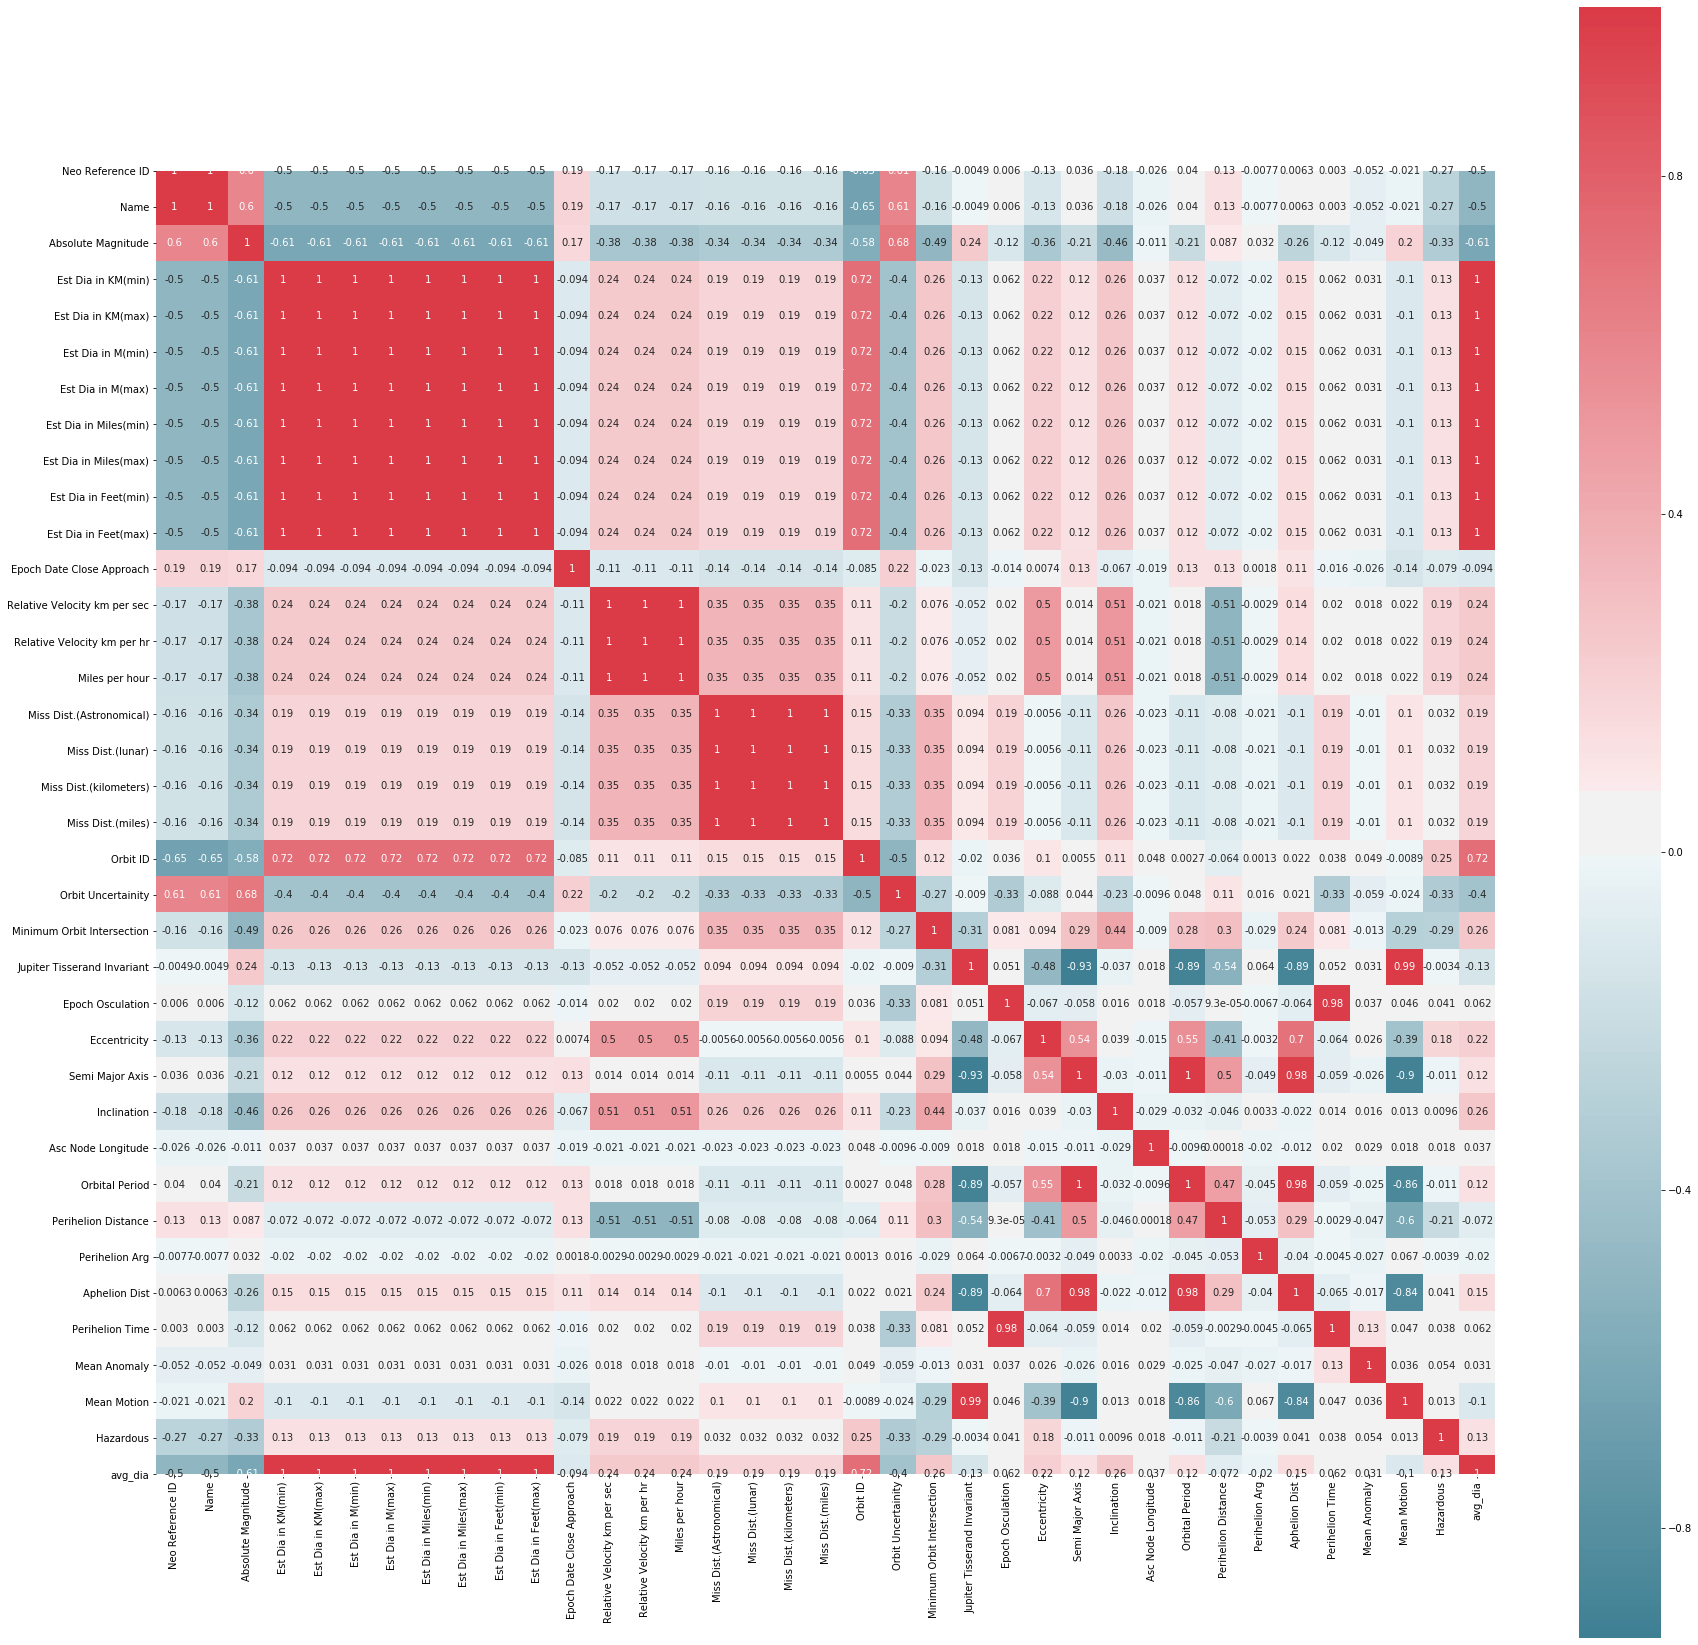

In [7]:
# heatplot
f, ax = plt.subplots(figsize=(30, 30))
corr = df.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)


In [8]:
#check for missing values
print(df.isnull().sum())

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [9]:
#check dataset for duplicate samples
df.duplicated().value_counts()

False    4687
dtype: int64

In [10]:
#print the statistical metrics
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,avg_dia
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.331057
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.597982
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.001635
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.054143
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.179284
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.410717
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,25.208245


label balance:
False    3932
True      755
Name: Hazardous, dtype: int64


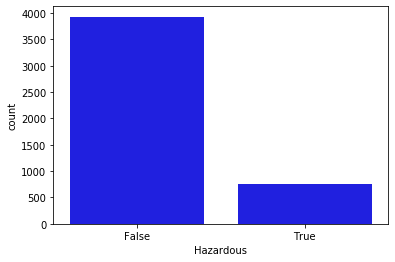

In [11]:
#countplot of labels
print("label balance:")
print(df.Hazardous.value_counts())

ax1=sns.countplot(df.Hazardous,color="blue")

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [13]:
def train_model(model,X_train, y_train, X_test,y_test):
    
    start_time = time.time()
    model.fit(X_train, y_train)
    
    delta_time = (time.time() - start_time)
    y_predict = model.predict(X_test)
    acc_model = accuracy_score(y_test, y_predict)
    prec_model = precision_score(y_test, y_predict,average= None)
    recall_model = recall_score(y_test, y_predict,average= None)
    log = np.array([[acc_model,prec_model[0],prec_model[1],recall_model[0],recall_model[1],delta_time]])
    
    print("training time: {0}".format(delta_time))
    print("accuracy: {0}".format(acc_model))
    print("\nconfusion matrix: ")
    print("-----------------------")
    print(confusion_matrix(y_test, y_predict))
    target_names = ['Not hazardous', 'Hazardous']
    print("\nclassification report:")
    print("-----------------------")
    print(classification_report(y_test, y_predict,target_names=target_names))
       
    return model, log

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report

In [15]:
from sklearn.linear_model import LogisticRegression
import time
Log_model = LogisticRegression(C=0.001, solver='lbfgs', multi_class='auto')
Log_model, model_log = (train_model(Log_model,X_train, y_train, X_test,y_test))

training time: 0.27479052543640137
accuracy: 0.8294243070362474

confusion matrix: 
-----------------------
[[775   4]
 [156   3]]

classification report:
-----------------------
               precision    recall  f1-score   support

Not hazardous       0.83      0.99      0.91       779
    Hazardous       0.43      0.02      0.04       159

     accuracy                           0.83       938
    macro avg       0.63      0.51      0.47       938
 weighted avg       0.76      0.83      0.76       938



In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
parameters =  {'C' : [0.1, 1, 10, 100], 
              'class_weight': [None,'balanced'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear']}
             
Grid_Log_model = GridSearchCV(estimator = LogisticRegression(), 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 6,
                           n_jobs = -1)


In [18]:
Grid_Log_model,log = train_model(Grid_Log_model,X_train, y_train, X_test,y_test)
model_log= np.append(model_log,log,axis=0)

c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


training time: 16.61405873298645
accuracy: 0.8272921108742004

confusion matrix: 
-----------------------
[[759  20]
 [142  17]]

classification report:
-----------------------
               precision    recall  f1-score   support

Not hazardous       0.84      0.97      0.90       779
    Hazardous       0.46      0.11      0.17       159

     accuracy                           0.83       938
    macro avg       0.65      0.54      0.54       938
 weighted avg       0.78      0.83      0.78       938



c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [19]:
from sklearn.svm import SVC
SVC_model= SVC(C=20, degree=3, gamma=0.001, kernel='rbf')

In [20]:
SVC_model,log = train_model(SVC_model,X_train, y_train, X_test,y_test)
model_log= np.append(model_log,log,axis=0)

training time: 2.804657459259033
accuracy: 0.8315565031982942

confusion matrix: 
-----------------------
[[779   0]
 [158   1]]

classification report:
-----------------------
               precision    recall  f1-score   support

Not hazardous       0.83      1.00      0.91       779
    Hazardous       1.00      0.01      0.01       159

     accuracy                           0.83       938
    macro avg       0.92      0.50      0.46       938
 weighted avg       0.86      0.83      0.76       938



In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=25, metric='manhattan')


In [23]:
knn_model,log = train_model(knn_model,X_train, y_train, X_test,y_test)
model_log= np.append(model_log,log,axis=0)

training time: 0.06077742576599121
accuracy: 0.8304904051172708

confusion matrix: 
-----------------------
[[779   0]
 [159   0]]

classification report:
-----------------------
               precision    recall  f1-score   support

Not hazardous       0.83      1.00      0.91       779
    Hazardous       0.00      0.00      0.00       159

     accuracy                           0.83       938
    macro avg       0.42      0.50      0.45       938
 weighted avg       0.69      0.83      0.75       938



c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [25]:
dec_tree,log = train_model(dec_tree,X_train, y_train, X_test,y_test)
model_log= np.append(model_log,log,axis=0)

training time: 0.15909743309020996
accuracy: 0.997867803837953

confusion matrix: 
-----------------------
[[777   2]
 [  0 159]]

classification report:
-----------------------
               precision    recall  f1-score   support

Not hazardous       1.00      1.00      1.00       779
    Hazardous       0.99      1.00      0.99       159

     accuracy                           1.00       938
    macro avg       0.99      1.00      1.00       938
 weighted avg       1.00      1.00      1.00       938



In [26]:
from sklearn.ensemble import RandomForestClassifier
rand_model=RandomForestClassifier(n_estimators=15)

In [27]:
rand_model,log = train_model(rand_model,X_train, y_train, X_test,y_test)
model_log= np.append(model_log,log,axis=0)

training time: 0.17472219467163086
accuracy: 1.0

confusion matrix: 
-----------------------
[[779   0]
 [  0 159]]

classification report:
-----------------------
               precision    recall  f1-score   support

Not hazardous       1.00      1.00      1.00       779
    Hazardous       1.00      1.00      1.00       159

     accuracy                           1.00       938
    macro avg       1.00      1.00      1.00       938
 weighted avg       1.00      1.00      1.00       938



In [28]:
from sklearn.naive_bayes import GaussianNB
naive_model=GaussianNB()

In [29]:
naive_model,log = train_model(naive_model,X_train, y_train, X_test,y_test)
model_log= np.append(model_log,log,axis=0)

training time: 0.016788721084594727
accuracy: 0.8070362473347548

confusion matrix: 
-----------------------
[[747  32]
 [149  10]]

classification report:
-----------------------
               precision    recall  f1-score   support

Not hazardous       0.83      0.96      0.89       779
    Hazardous       0.24      0.06      0.10       159

     accuracy                           0.81       938
    macro avg       0.54      0.51      0.50       938
 weighted avg       0.73      0.81      0.76       938



In [30]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

number_of_estimators = 200
complexity = 10
cart = cart = LogisticRegression(solver='lbfgs', C=complexity)
ADA_model = BaggingClassifier(base_estimator=cart, n_estimators=number_of_estimators)

In [31]:
ADA_model,log = train_model(ADA_model,X_train, y_train, X_test,y_test)
model_log= np.append(model_log,log,axis=0)

training time: 14.577214241027832
accuracy: 0.8283582089552238

confusion matrix: 
-----------------------
[[774   5]
 [156   3]]

classification report:
-----------------------
               precision    recall  f1-score   support

Not hazardous       0.83      0.99      0.91       779
    Hazardous       0.38      0.02      0.04       159

     accuracy                           0.83       938
    macro avg       0.60      0.51      0.47       938
 weighted avg       0.75      0.83      0.76       938



In [32]:
model_xgb = XGBClassifier()

In [33]:
model_xgb,log = train_model(model_xgb,X_train, y_train, X_test,y_test)
model_log= np.append(model_log,log,axis=0)

training time: 2.400512218475342
accuracy: 1.0

confusion matrix: 
-----------------------
[[779   0]
 [  0 159]]

classification report:
-----------------------
               precision    recall  f1-score   support

Not hazardous       1.00      1.00      1.00       779
    Hazardous       1.00      1.00      1.00       159

     accuracy                           1.00       938
    macro avg       1.00      1.00      1.00       938
 weighted avg       1.00      1.00      1.00       938



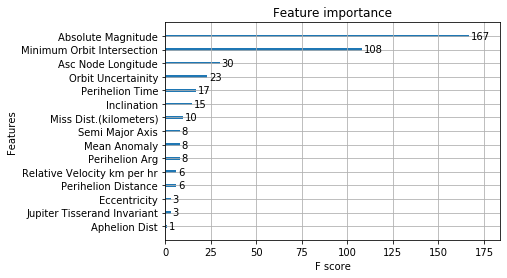

In [34]:
plot_importance(model_xgb)
pyplot.show()

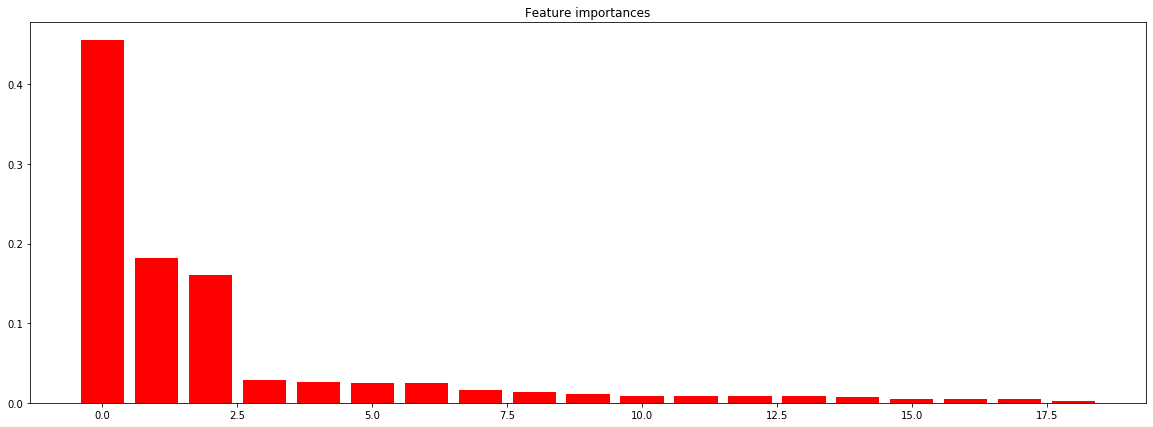

In [35]:
importances = rand_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20,7))
plt.title("Feature importances")
ax = plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")

plt.show()

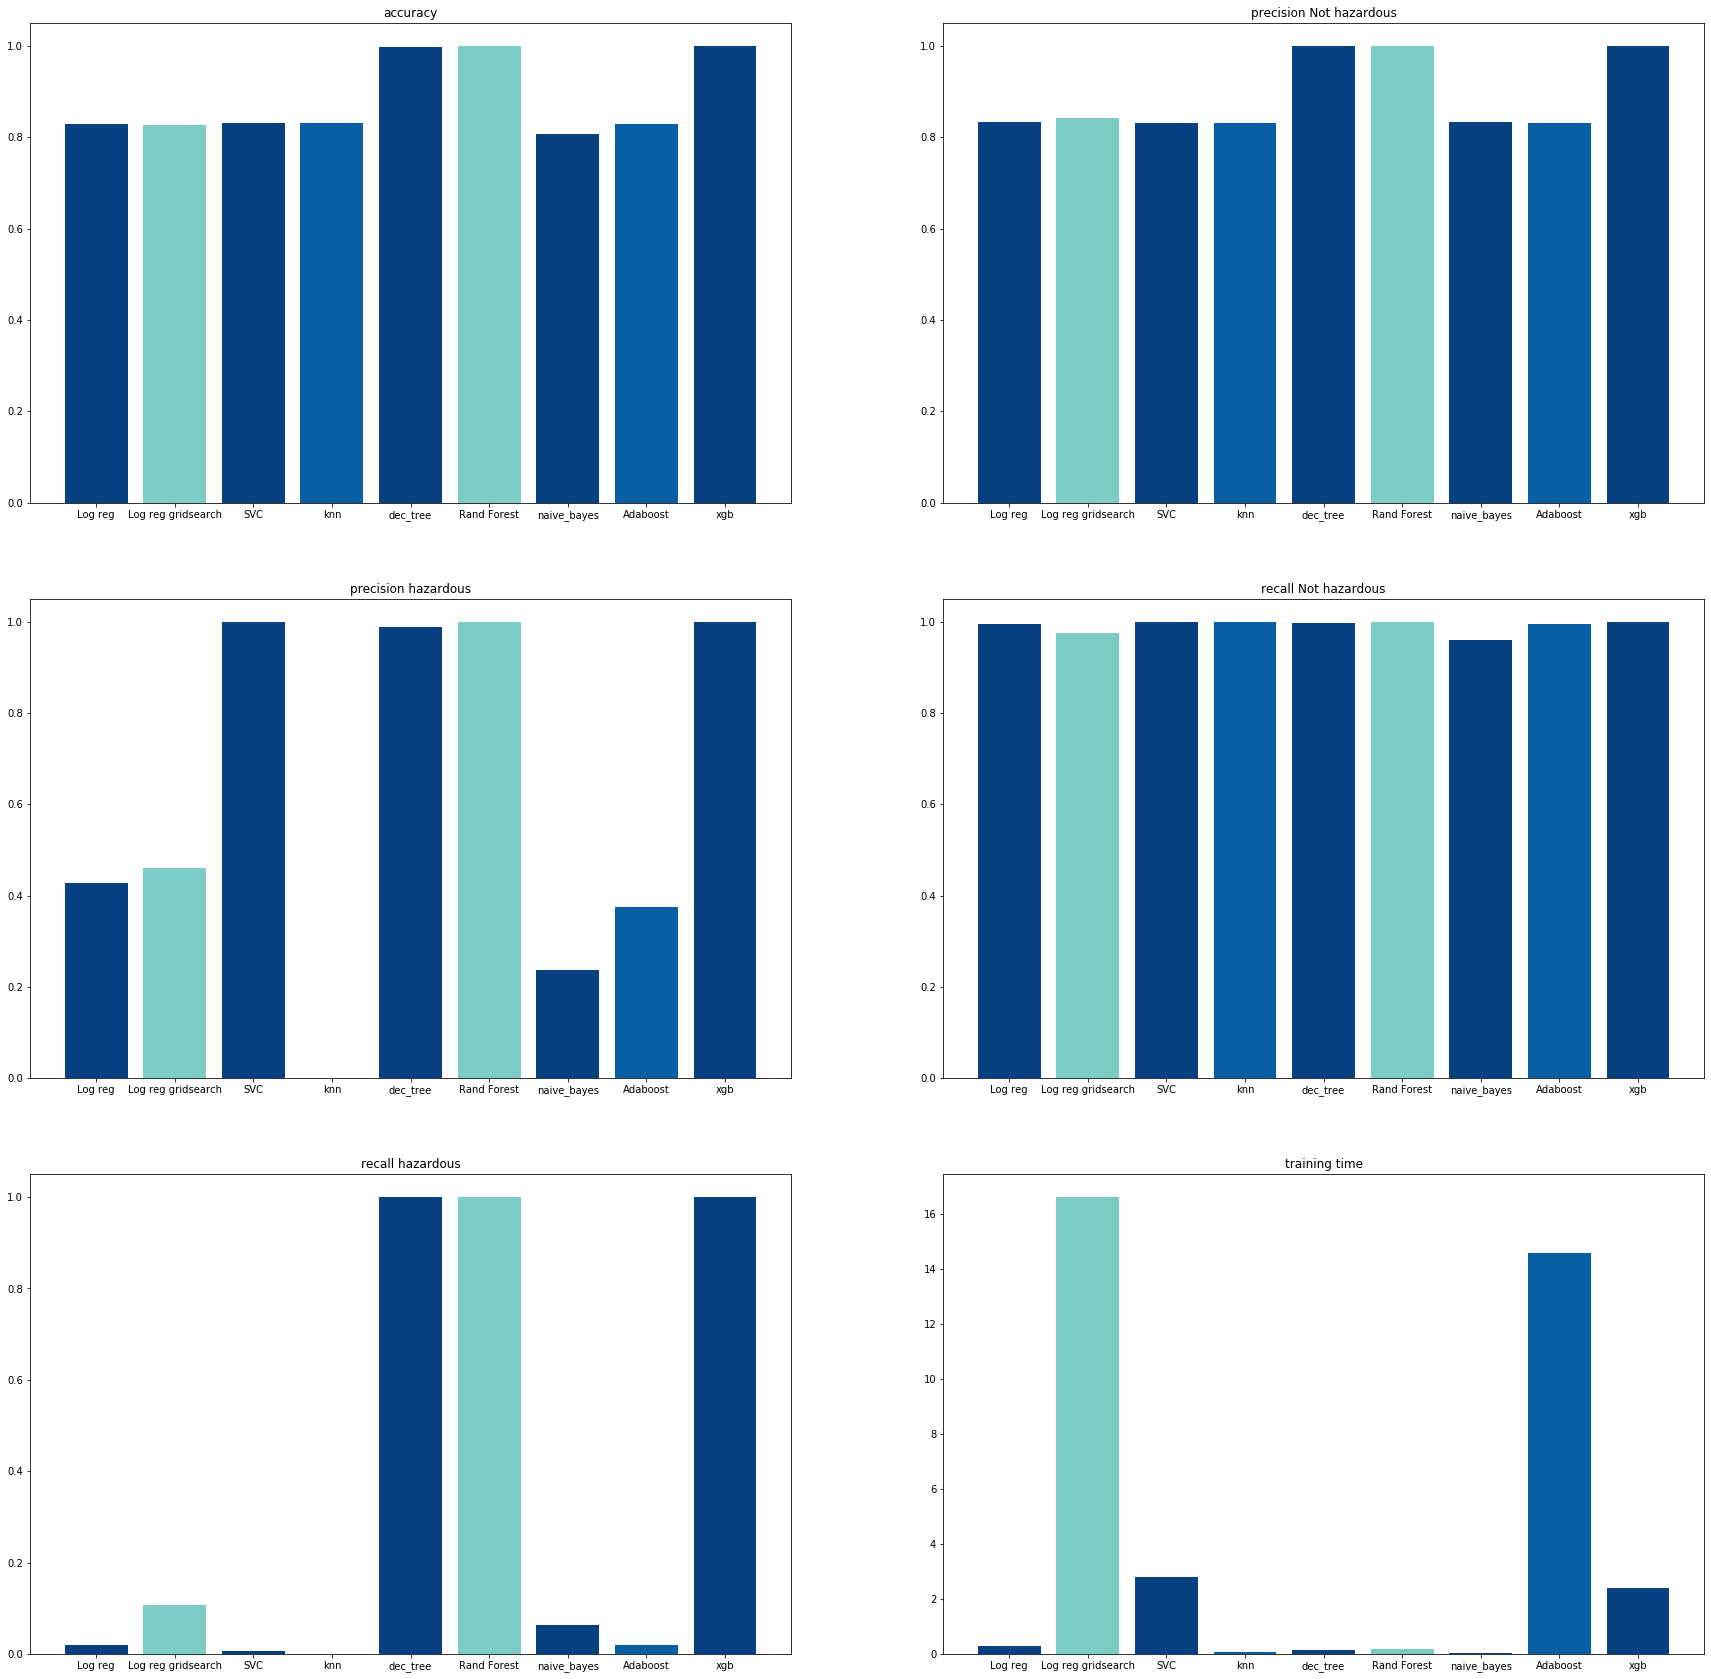

In [36]:
model_names = ('Log reg', 'Log reg gridsearch','SVC','knn','dec_tree','Rand Forest','naive_bayes', 'Adaboost','xgb')
column_names = ('accuracy','precision Not hazardous','precision hazardous','recall Not hazardous','recall hazardous','training time')

plt.figure(figsize=(30,30)) 
colors=[1000,500,1000,900]
colors = [x / max(colors) for x in colors]
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(colors)
for i in range(0,6): 
    plt.subplot(3,2,i+1) 
    ax=plt.bar(x=model_names,height=model_log[:,i],color=colors)
    plt.title(column_names[i])
plt.show()

In [37]:
pd.DataFrame(data=model_log,index=model_names,columns=column_names)

,accuracy,precision Not hazardous,precision hazardous,recall Not hazardous,recall hazardous,training time
Log reg,0.829424,0.832438,0.428571,0.994865,0.018868,0.274791
Log reg gridsearch,0.827292,0.842397,0.459459,0.974326,0.106918,16.614059
SVC,0.831557,0.831377,1.000000,1.000000,0.006289,2.804657
knn,0.830490,0.830490,0.000000,1.000000,0.000000,0.060777
dec_tree,0.997868,1.000000,0.987578,0.997433,1.000000,0.159097
Rand Forest,1.000000,1.000000,1.000000,1.000000,1.000000,0.174722
naive_bayes,0.807036,0.833705,0.238095,0.958922,0.062893,0.016789
Adaboost,0.828358,0.832258,0.375000,0.993582,0.018868,14.577214
xgb,1.000000,1.000000,1.000000,1.000000,1.000000,2.400512
